In [17]:
from tvb.simulator.lab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plc
import time as tm
import mest_function
import simulation_function
from utils import *
import logging
logging.disable(logging.CRITICAL)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data
data_path = '/Users/gpret/Desktop/MEDICINA/TVB_Distribution/demo_scripts/myScripts/For_OHBM/For_OHBM/tutorial_data'

In [3]:
#Here I set the x0 emulating a temporal sclerosis, which is worse in in the anterior right hippocampus but also made 
#damage to nearby areas, as showed in common MRI findings (https://radiopaedia.org/articles/1664)

EZ = ['Right-Hippocampus-anterior']
PZ = ['Right-Hippocampus-posterior', 'Right-Parahippocampal-cortex', 'Right-Rhinal-cortex', 'Right-Amygdala', 'Right-T3-anterior', 
      'Right-Posterior-cingulate-cortex-dorsal', 'Right-Posterior-cingulate-cortex-retrosplenial-gyrus']

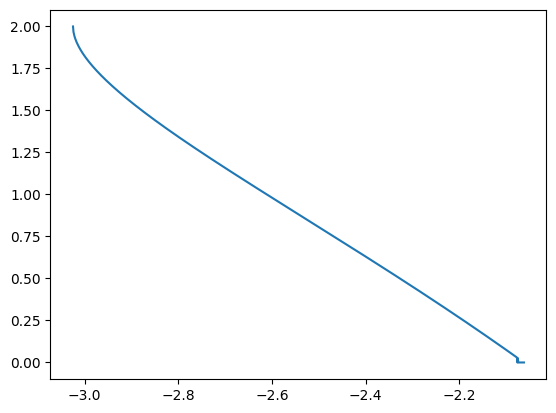

In [35]:
setup = simulation_function.general_setup(data_path)
theX0s = np.arange(-2.7, -2.5, 0.1)
all_the_deltas, X0s = mest_function.f1_find_the_delta()

In [36]:
theX0s

array([-2.9, -2.8, -2.7])

[-1.98742113e+00 -1.87492138e+01  4.05295970e+00 -1.05214059e+00
 -4.95543740e-20 -1.98742113e-01]
Stimuli applied from the SEEG electrode is 1.9
Starting simulation...
Finished simulation.
execute for 307.01848101615906
The variance of the amplitude of the signal is:  0.000494104981966896
[-1.98742113e+00 -1.87492138e+01  4.05295970e+00 -1.05214059e+00
 -4.95543740e-20 -1.98742113e-01]
Stimuli applied from the SEEG electrode is 1.9
Starting simulation...
Finished simulation.
execute for 297.7606339454651
The variance of the amplitude of the signal is:  0.0003231028824084084
[-1.98742113e+00 -1.87492138e+01  4.05295970e+00 -1.05214059e+00
 -4.95543740e-20 -1.98742113e-01]
Stimuli applied from the SEEG electrode is 1.9
Starting simulation...


KeyboardInterrupt: 

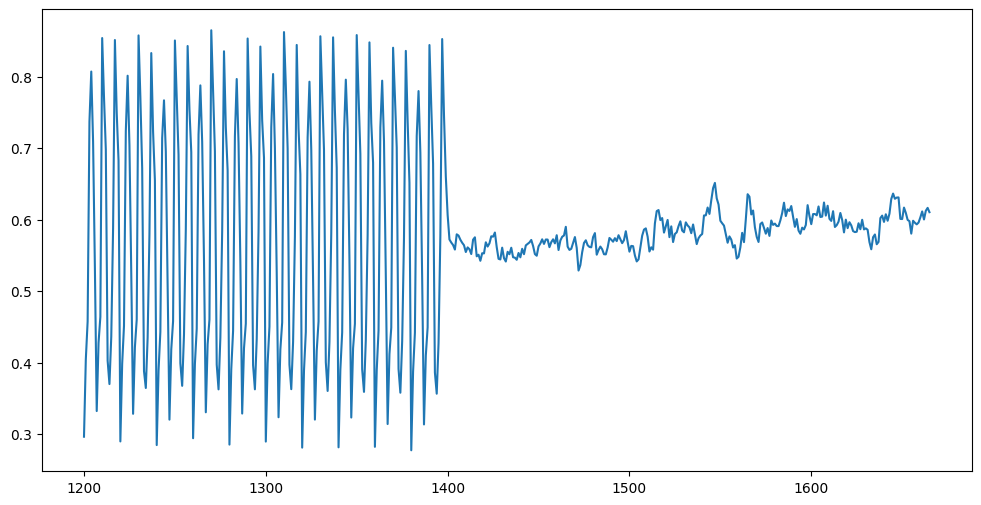

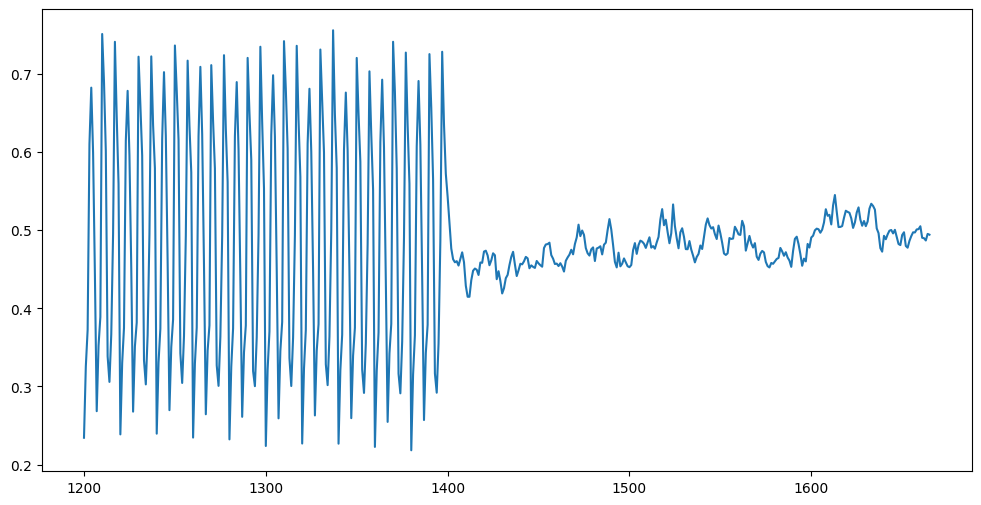

In [31]:
theI = 1.9 #round(all_the_deltas[np.where(X0s == round(-3., 3))[0][0]], 2)
Is = []

for thex0 in theX0s:
    seizing = True
    while(seizing):
        sig_normal, regions = simulation_function.simulate(EZ, PZ, thex0, theI, setup)
        mySig = sig_normal[int(4300/3):int(4800/3), np.where(roi==EZ)[0][0]]
        tts = np.arange(0, len(sig_normal)*3 + 1, 1)
        variance = np.mean((mySig - np.mean(mySig))**2)
        print('The variance of the amplitude of the signal is: ', variance)
        varianceA.append(variance)
        if variance>0.01:
            theI = theI - 0.05
        else: 
            plt.figure(figsize=(12,6))
            plt.plot(tts[int(3600/3):int(5000/3)], sig_normal[int(3600/3):int(5000/3), np.where(roi==EZ)[0][0]], label='Signal')
            Is.append(theI)
            seizing = False

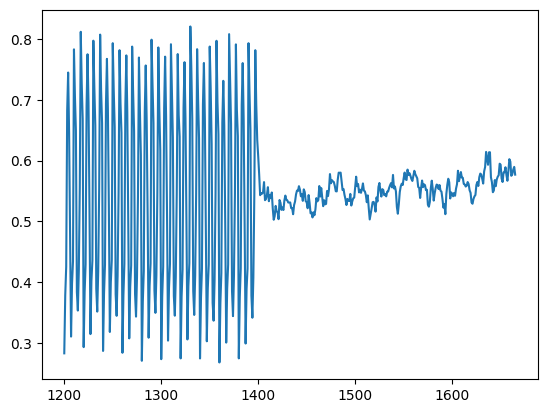

In [28]:
plt.plot(tts[int(3600/3):int(5000/3)], sig_normal[int(3600/3):int(5000/3), np.where(roi==EZ)[0][0]], label='Signal')

1.82

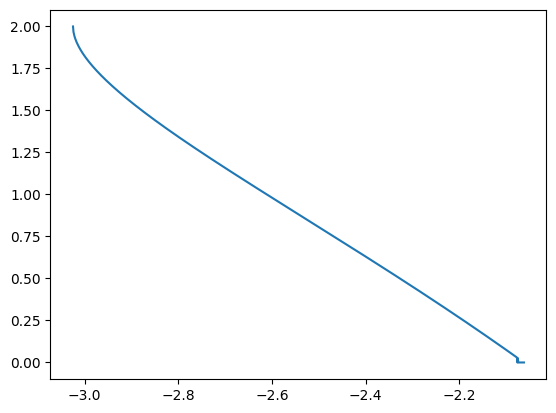

In [20]:
theX0s = np.arange(-3., -2., 0.1)
all_the_deltas, X0s = mest_function.f1_find_the_delta()
theI = round(all_the_deltas[np.where(X0s == round(-3., 3))[0][0]], 2)
theI

In [13]:
tts = np.arange(0, len(signal)*3 + 1, 1)

In [14]:
tts

array([   0,    1,    2, ..., 6997, 6998, 6999])

## Signal analysis and plottings

NameError: name 'epileptors' is not defined

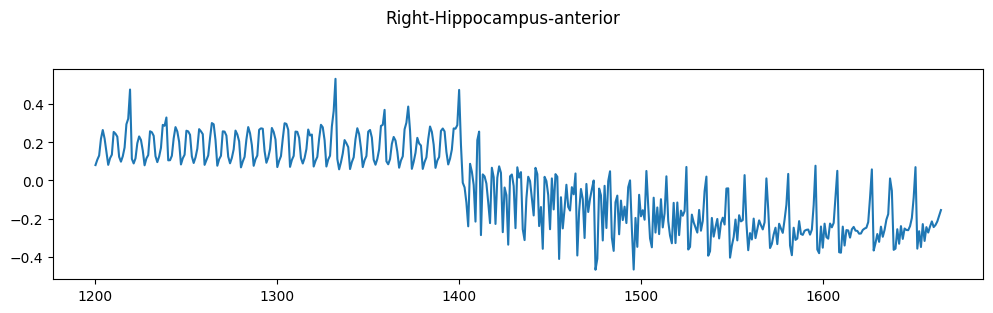

In [15]:
myroi = ['Right-Hippocampus-anterior', 'Right-Hippocampus-posterior', 'Right-Amygdala', 'Right-Cuneus', 'Left-Frontal-pole']
srcSig_normal = signal
PpA = []
p2paA = []
abspowerA = []
varianceA = []

for k in myroi:    
    mySig = srcSig_normal[int(4300/3):int(4800/3), np.where(roi==k)[0][0]]
    power = np.mean(np.abs(mySig)**2)
    power
    # Compute the FFT and the power spectrum
    X = np.fft.fft(mySig) # FFT array
    P = np.abs(X)**2 # Power spectrum array
    f = np.fft.fftfreq(len(mySig), 1/256) # Frequency array

    # Shift the spectrum and the frequencies
    #X = np.fft.fftshift(X) # Shifted FFT array
    #P = np.fft.fftshift(P) # Shifted power spectrum array
    #f = np.fft.fftshift(f) # Shifted frequency array

    P = np.log10(P)

    # Plot the signal and the spectrum
    plt.figure(figsize=(12,6))
    plt.subplot(211)
    plt.plot(tts[int(3600/3):int(5000/3)], srcSig_normal[int(3600/3):int(5000/3), np.where(roi==k)[0][0]], label='Signal')
    plt.suptitle(k)
    plt.title(epileptors.x0[np.where(roi==k)])
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.axvline(x=4300, color='r')
    plt.axvline(x=4800, color='r')
    plt.legend()
    plt.subplot(212)
    plt.plot(f, P, label='Power spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    #plt.xlim(0, 40) # Zoom in to the relevant frequency range
    plt.legend()
    plt.show()
    
    Pp = max(P)
    print('The Power peak is: ', Pp)
    PpA.append(Pp)
    
    #Peak to peak amplitude
    p2pa = max(mySig) - min(mySig)
    print('The Peak to peak amplitude is: ', p2pa)
    p2paA.append(p2pa)
    
    #Absolute power
    abspower = np.mean(mySig**2)
    print('The absoute power is: ', abspower)
    abspowerA.append(abspower)
    
    #Variance of the amplitude
    variance = np.mean((mySig - np.mean(mySig))**2)
    print('The variance of the amplitude of the signal is: ', variance)
    varianceA.append(variance)

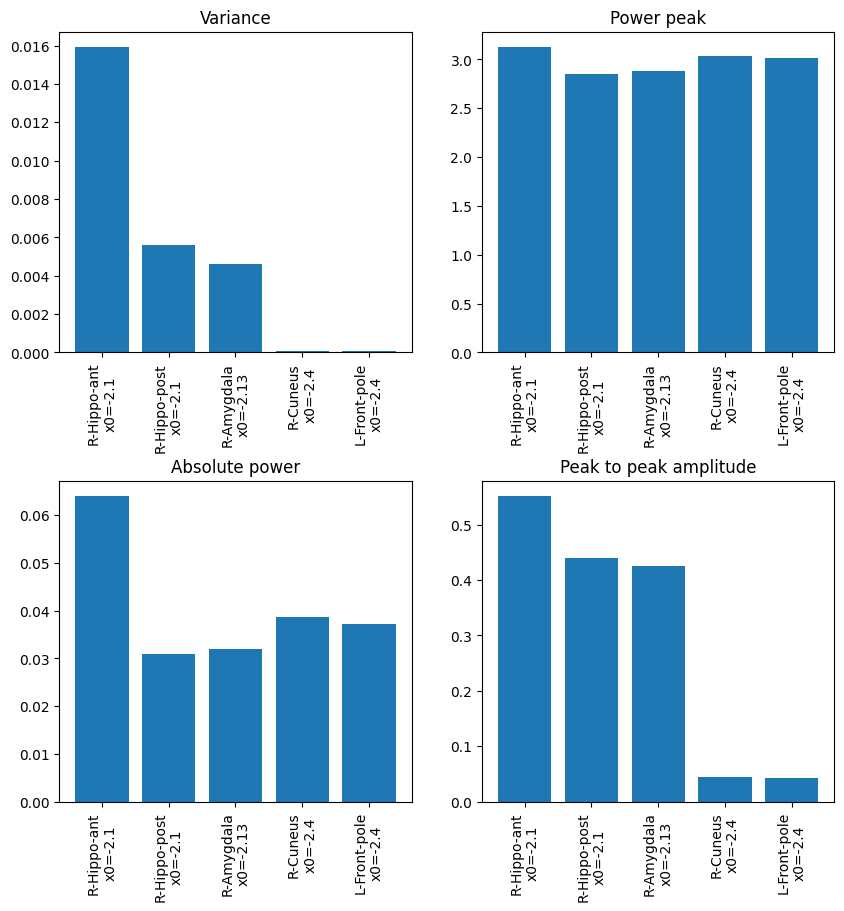

In [10]:
myshortroi = ['R-Hippo-ant', 'R-Hippo-post', 'R-Amygdala', 'R-Cuneus', 'L-Front-pole']
strxo = []
for j in myroi:
    strxo.append(str(round(float(epileptors.x0[np.where(roi==j)][0]),3)))
myx0roi = []  
for jj, kk in enumerate(myshortroi):
    myx0roi.append(kk+"\nx0="+strxo[jj])

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,10))

ax[0][0].bar(np.arange(0,len(myroi),1), varianceA)
ax[0][0].tick_params(axis='x', rotation=90)
ax[0][0].set_xticks(np.arange(0,len(myroi),1), labels = myx0roi)
ax[0][0].set_title("Variance")

ax[1][0].bar(np.arange(0,len(myroi),1), abspowerA)
ax[1][0].tick_params(axis='x', rotation=90)
ax[1][0].set_xticks(np.arange(0,len(myroi),1), labels = myx0roi)
ax[1][0].set_title("Absolute power")

ax[0][1].bar(np.arange(0,len(myroi),1), PpA)
ax[0][1].tick_params(axis='x', rotation=90)
ax[0][1].set_xticks(np.arange(0,len(myroi),1), labels = myx0roi)
ax[0][1].set_title("Power peak")

ax[1][1].bar(np.arange(0,len(myroi),1), p2paA)
ax[1][1].tick_params(axis='x', rotation=90)
ax[1][1].set_xticks(np.arange(0,len(myroi),1), labels = myx0roi)
ax[1][1].set_title("Peak to peak amplitude")

plt.subplots_adjust(hspace=0.4)
plt.show()


## Now let's apply the drug

In [1]:
drug = 'valproate'
dose = 15
starting_x0ez = x0ez
#starting_x0pz = x0ez

final_x0ez = mest_function.dose_effect(drug, dose, starting_x0ez)
all_the_deltas, _ = mest_function.f1_find_the_delta()
#final_x0pz = round(mest_function.dose_effect(drug, dose, starting_x0pz),3)


print(final_x0ez)

NameError: name 'x0ez' is not defined

In [ ]:
# Here we set up the EZ node such that it is close to the critical working point, i.e. the seizure threshold
x0ez= final_x0ez
x0pz= final_x0ez
x0num=-2.4

epileptors = models.Epileptor(r=np.array([0.00035]))
epileptors.x0 = x0num*np.ones(nb_regions)
epileptors.x0[idx_EZ] = x0ez
for id in idx_PZ:
    epileptors.x0[id] = x0pz
    x0pz -= 0.01

# Initial conditions
init_cond = np.array([-1.98742113e+00 , -1.87492138e+01, 4.0529597e+00, -1.05214059e+00, -4.95543740e-20, -1.98742113e-01])
print(init_cond)
init_cond_reshaped = np.repeat(init_cond, nb_regions).reshape((1, len(init_cond), nb_regions, 1))

# Simulator
sim = simulator.Simulator(model=epileptors,
                          stimulus=stimulus, 
                          initial_conditions=init_cond_reshaped,
                          connectivity=con,
                          coupling=coupl,
                          integrator=heunint,
                          monitors=mons)

sim.configure()

# Run
simulation_length = 7000
print("Starting simulation...")
tic = tm.time()
ttavg = sim.run(simulation_length=simulation_length)
print("Finished simulation.")
print('execute for ' + str(tm.time()-tic))

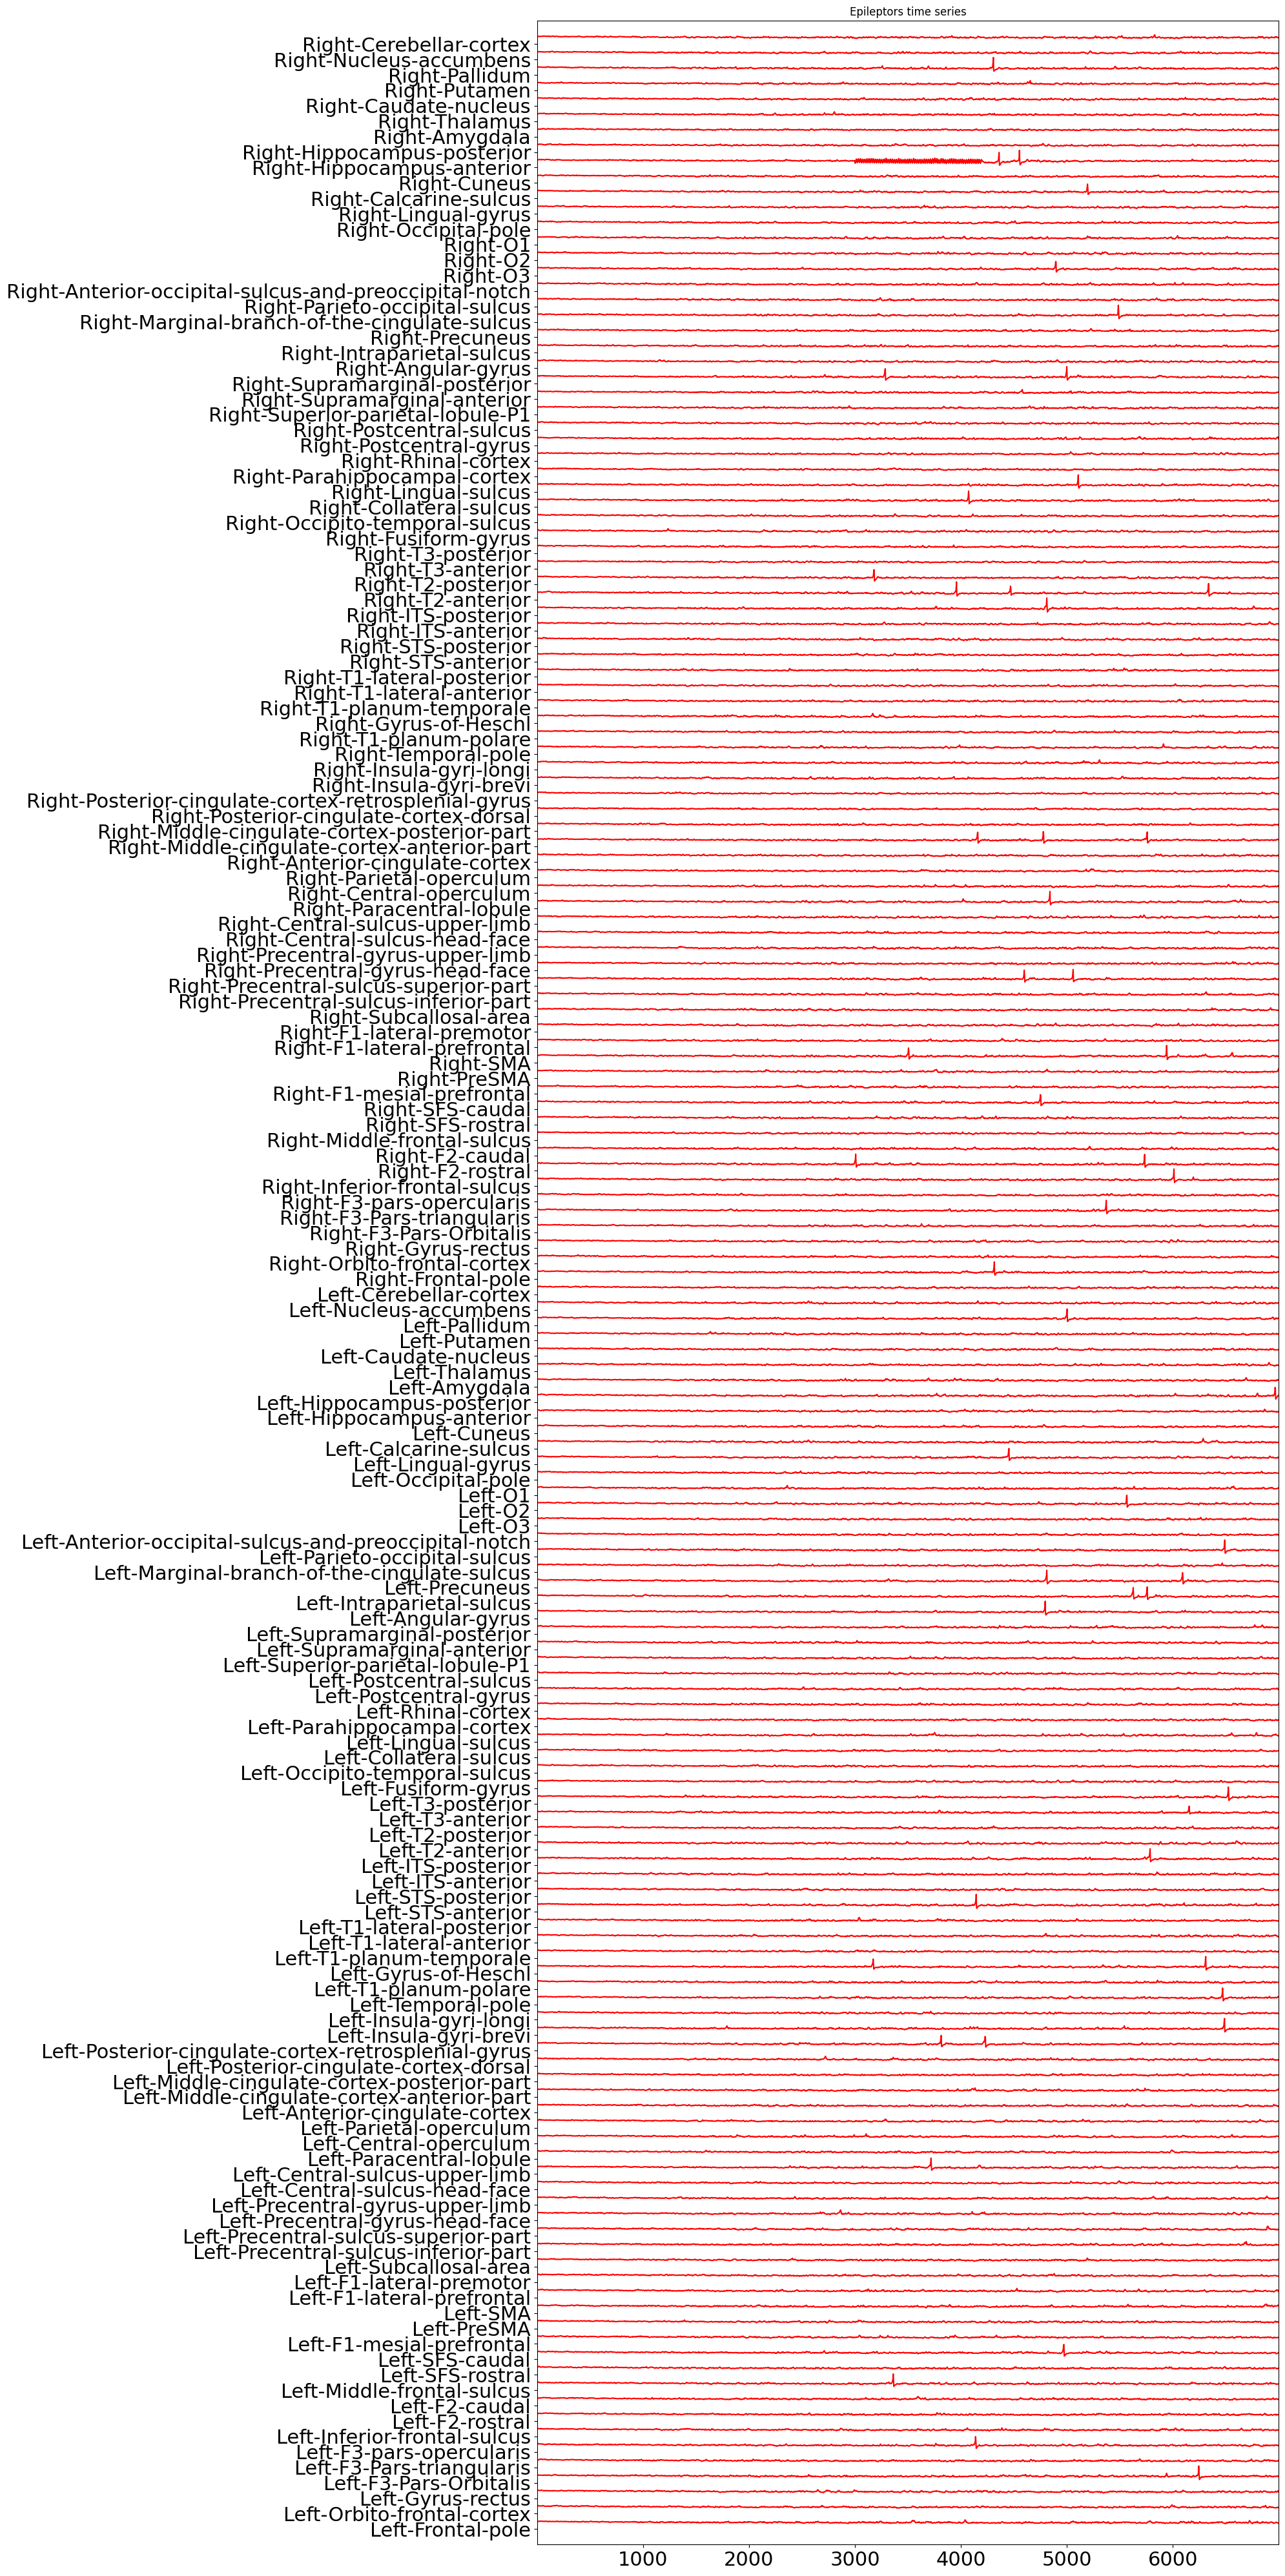

In [13]:
tts = ttavg[0][0]
tavg = ttavg[0][1]
srcSig = tavg[:,0,:,0]
start_idx = 0
end_idx = tavg.shape[0]

srcSig_normal=srcSig/np.ptp(srcSig)
#Plot raw time series
figure= plt.figure(figsize=(20,40))
plt.plot(tts[start_idx:end_idx], srcSig_normal[start_idx:end_idx] + np.r_[:162], 'r')
plt.title("Epileptors time series")
roi = con.region_labels
plt.yticks(np.arange(len(roi)),roi, fontsize=22)

# These should be set manually, since they depend on the model parameters
plt.xticks(fontsize=22)
plt.ylim([-1,len(roi)+0.5])
plt.xlim([tts[start_idx],tts[end_idx-1]])
plt.tight_layout()
plt.show()

## Hippo anterior

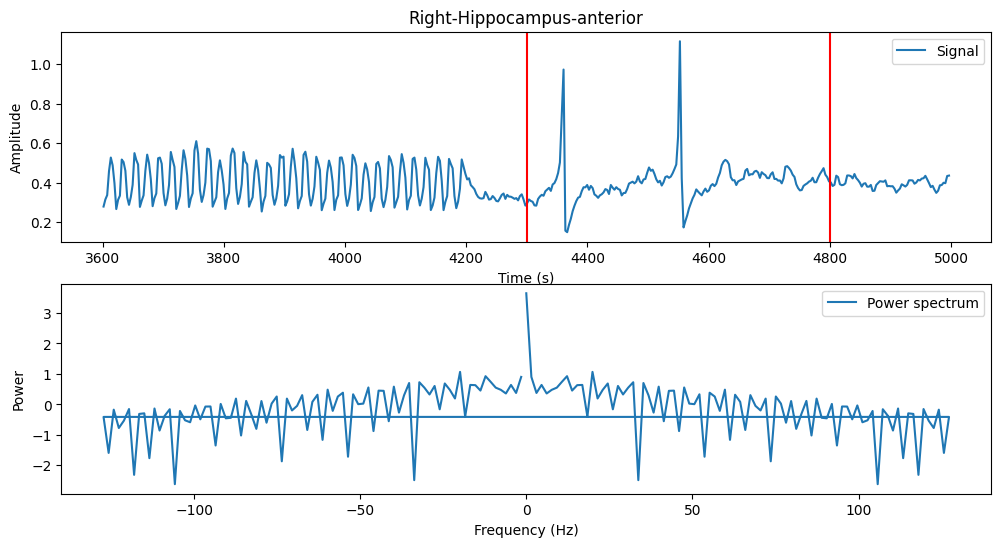

The Power peak is:  3.6494172251326082
The Peak to peak amplitude is:  0.9655203622915194
The absoute power is:  0.17049985488768699
The variance of the amplitude of the signal is:  0.010549840738647101


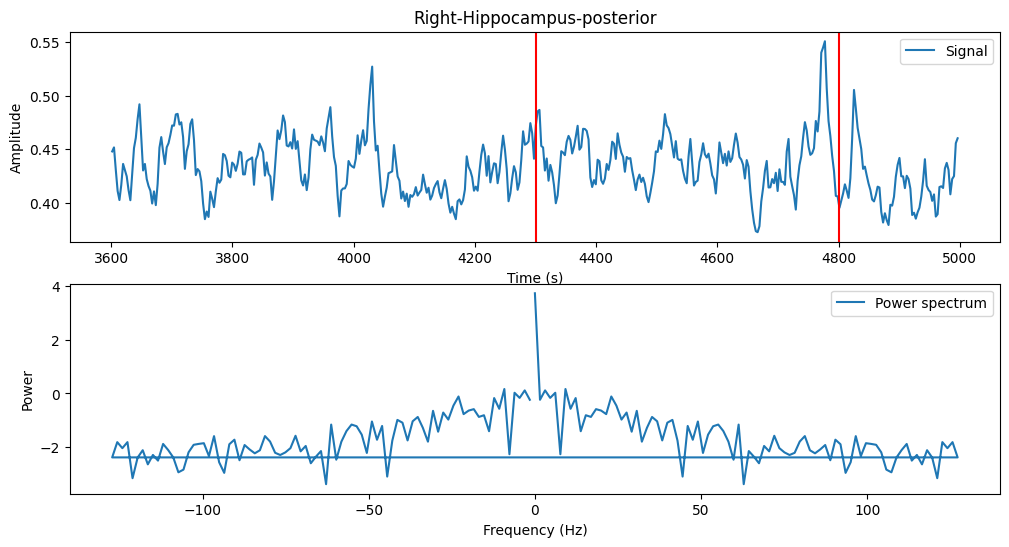

The Power peak is:  3.731573572806167
The Peak to peak amplitude is:  0.1784768821442831
The absoute power is:  0.1939780587676047
The variance of the amplitude of the signal is:  0.0007186571515332039


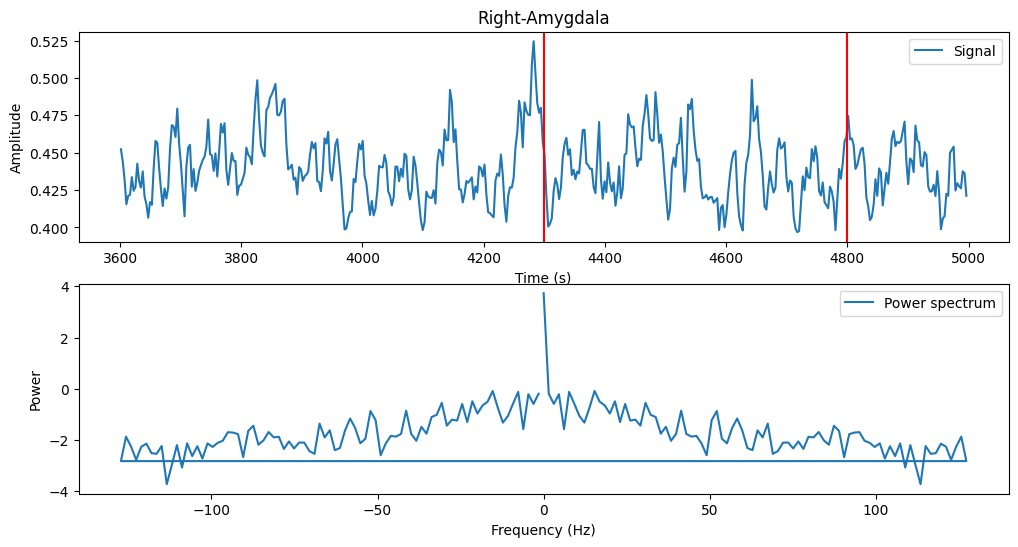

The Power peak is:  3.7285056442155082
The Peak to peak amplitude is:  0.10192632643935923
The absoute power is:  0.1923725147753142
The variance of the amplitude of the signal is:  0.0004735190525968434


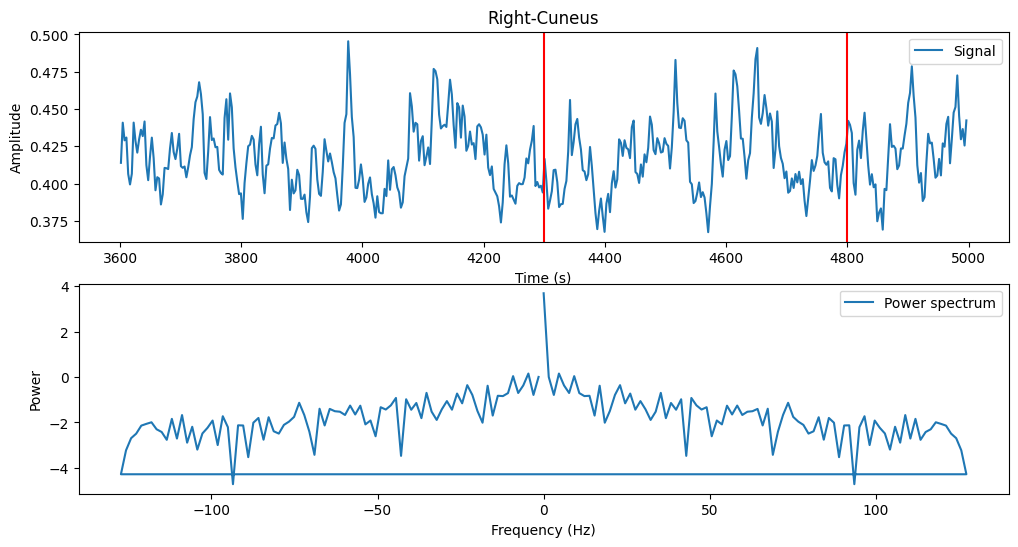

The Power peak is:  3.685141141385059
The Peak to peak amplitude is:  0.12352795113424714
The absoute power is:  0.17421458249797034
The variance of the amplitude of the signal is:  0.0005512226223063127


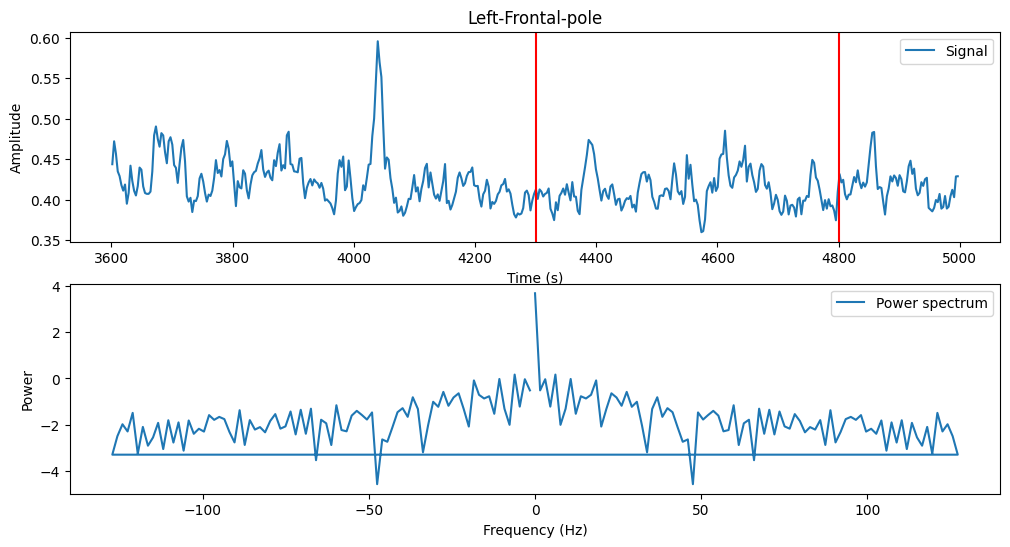

The Power peak is:  3.6757702188292014
The Peak to peak amplitude is:  0.12551078868792676
The absoute power is:  0.17046814267215205
The variance of the amplitude of the signal is:  0.0005118392535222625


In [14]:
myroi = ['Right-Hippocampus-anterior', 'Right-Hippocampus-posterior', 'Right-Amygdala', 'Right-Cuneus', 'Left-Frontal-pole']
PpA1 = []
p2paA1 = []
abspowerA1 = []
varianceA1 = []

for k in myroi:    
    mySig = srcSig_normal[int(4300/3):int(4800/3), np.where(roi==k)[0][0]]
    power = np.mean(np.abs(mySig)**2)
    power
    # Compute the FFT and the power spectrum
    X = np.fft.fft(mySig) # FFT array
    P = np.abs(X)**2 # Power spectrum array
    f = np.fft.fftfreq(len(mySig), 1/256) # Frequency array

    # Shift the spectrum and the frequencies
    #X = np.fft.fftshift(X) # Shifted FFT array
    #P = np.fft.fftshift(P) # Shifted power spectrum array
    #f = np.fft.fftshift(f) # Shifted frequency array

    P = np.log10(P)

    # Plot the signal and the spectrum
    plt.figure(figsize=(12,6))
    plt.subplot(211)
    plt.plot(tts[int(3600/3):int(5000/3)], srcSig_normal[int(3600/3):int(5000/3), np.where(roi==k)[0][0]], label='Signal')
    plt.title(k)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.axvline(x=4300, color='r')
    plt.axvline(x=4800, color='r')
    plt.legend()
    plt.subplot(212)
    plt.plot(f, P, label='Power spectrum')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    #plt.xlim(0, 40) # Zoom in to the relevant frequency range
    plt.legend()
    plt.show()
    
    Pp = max(P)
    print('The Power peak is: ', Pp)
    PpA1.append(Pp)
    
    #Peak to peak amplitude
    p2pa = max(mySig) - min(mySig)
    print('The Peak to peak amplitude is: ', p2pa)
    p2paA1.append(p2pa)
    
    #Absolute power
    abspower = np.mean(mySig**2)
    print('The absoute power is: ', abspower)
    abspowerA1.append(abspower)
    
    #Variance of the amplitude
    variance = np.mean((mySig - np.mean(mySig))**2)
    print('The variance of the amplitude of the signal is: ', variance)
    varianceA1.append(variance)

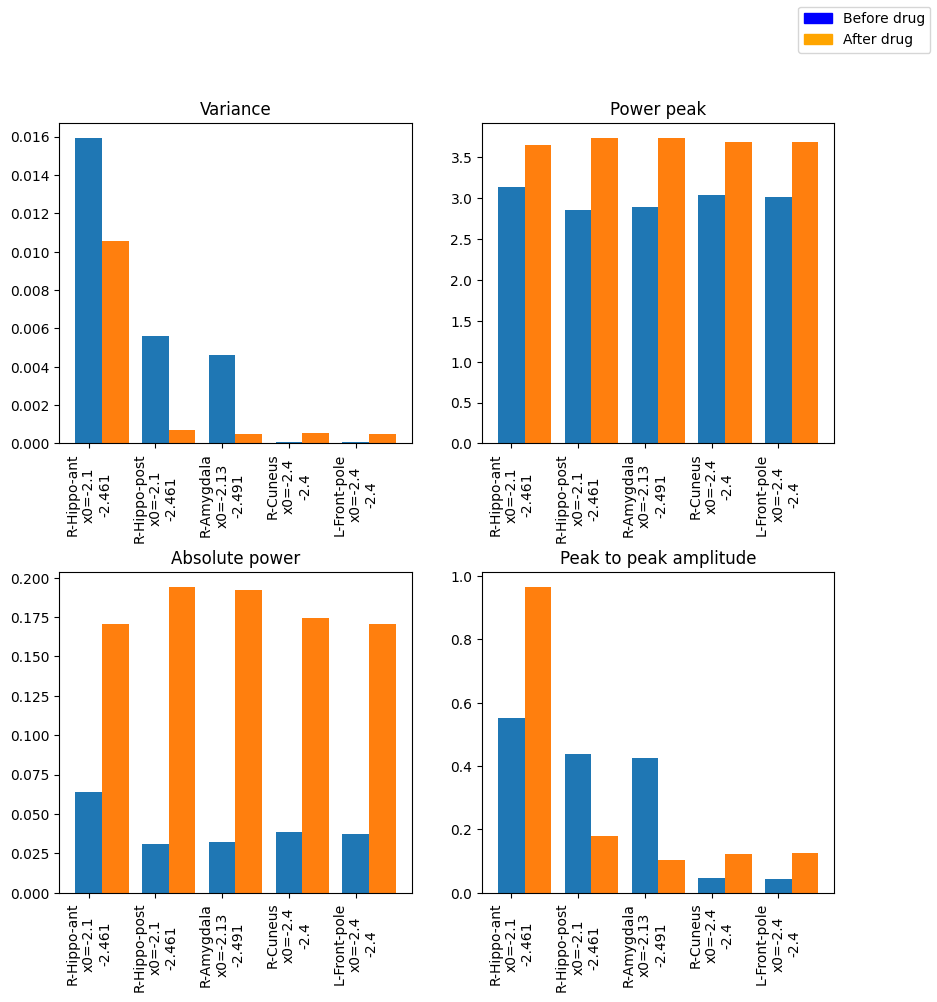

In [32]:
import matplotlib.patches as mpatch

myshortroi = ['R-Hippo-ant', 'R-Hippo-post', 'R-Amygdala', 'R-Cuneus', 'L-Front-pole']

newstrxo = []
for j in myroi:
    newstrxo.append(str(round(float(epileptors.x0[np.where(roi==j)][0]),3)))
myx0roi = []  
for jj, kk in enumerate(myshortroi):
    myx0roi.append(kk+"\nx0="+strxo[jj]+"\n"+newstrxo[jj])

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,10))

width = 0.4

ax[0][0].bar(np.arange(0,len(myroi),1), varianceA, width = width)
ax[0][0].bar(np.arange(0,len(myroi),1)+width, varianceA1, width = width)
ax[0][0].tick_params(axis='x', rotation=90)
ax[0][0].set_xticks(np.arange(0,len(myroi),1), labels = myx0roi)
ax[0][0].set_title("Variance")

ax[1][0].bar(np.arange(0,len(myroi),1), abspowerA, width = width)
ax[1][0].bar(np.arange(0,len(myroi),1)+width, abspowerA1, width = width)
ax[1][0].tick_params(axis='x', rotation=90)
ax[1][0].set_xticks(np.arange(0,len(myroi),1), labels = myx0roi)
ax[1][0].set_title("Absolute power")

ax[0][1].bar(np.arange(0,len(myroi),1), PpA, width = width)
ax[0][1].bar(np.arange(0,len(myroi),1)+width, PpA1, width = width)
ax[0][1].tick_params(axis='x', rotation=90)
ax[0][1].set_xticks(np.arange(0,len(myroi),1), labels = myx0roi)
ax[0][1].set_title("Power peak")

ax[1][1].bar(np.arange(0,len(myroi),1), p2paA, width = width)
ax[1][1].bar(np.arange(0,len(myroi),1)+width, p2paA1, width = width)
ax[1][1].tick_params(axis='x', rotation=90)
ax[1][1].set_xticks(np.arange(0,len(myroi),1), labels = myx0roi)
ax[1][1].set_title("Peak to peak amplitude")

plt.subplots_adjust(hspace=0.4)
orange_patch = mpatch.Patch(color = 'orange', label = 'After drug')
blue_patch = mpatch.Patch(color = 'blue', label = 'Before drug')
fig.legend(handles = [blue_patch, orange_patch])

plt.show()
